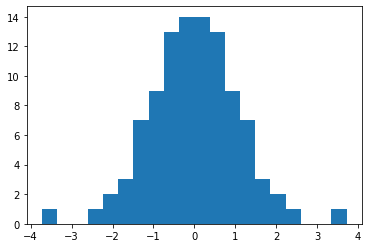

In [56]:
# Try transforming a constant Nxd signal into an Nx1 normal distribution

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def makeGaussPoints(N,d):
    Y = np.linspace(0.0001,0.9999,N)
    x = norm.ppf(Y)
#     y = norm.pdf(x)
#     plt.plot(x,y)
#     plt.show()
    Nx = x.reshape([-1,1])@np.ones([1,d])
    return Nx

Nx = makeGaussPoints(100,1)

plt.hist(Nx[:,0], 20)
plt.show()

sig = np.arange(0,100,1).reshape([-1,1])@np.random.randn(1,10)

epoch 0 loss=95.644714


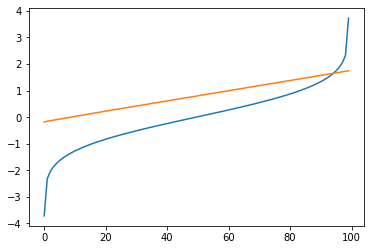

epoch 50 loss=137.169189


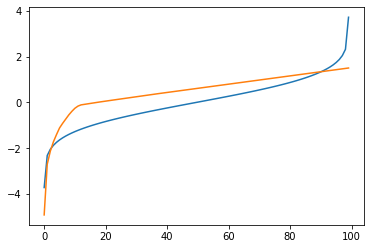

epoch 100 loss=25.105751


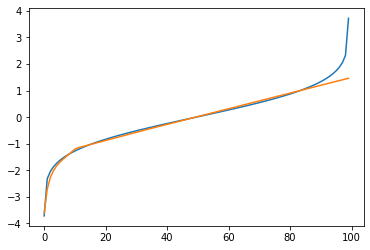

epoch 150 loss=6.434348


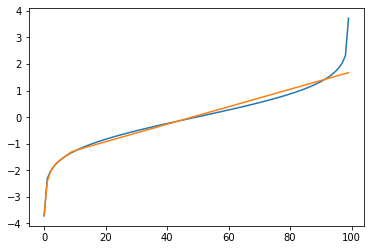

epoch 200 loss=6.969095


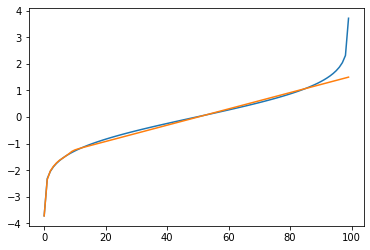

epoch 250 loss=6.081594


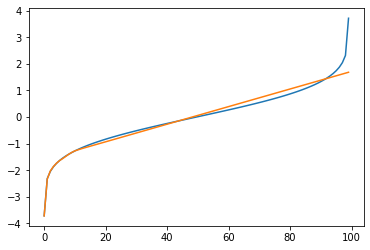

epoch 300 loss=5.973839


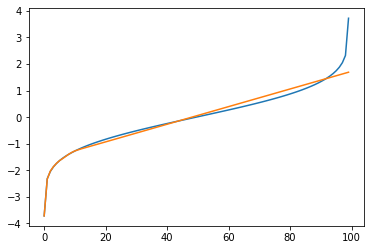

epoch 350 loss=5.974917


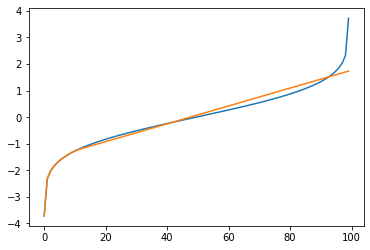

epoch 400 loss=7.690840


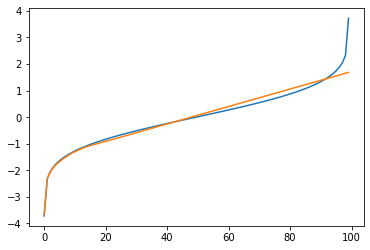

epoch 450 loss=5.954163


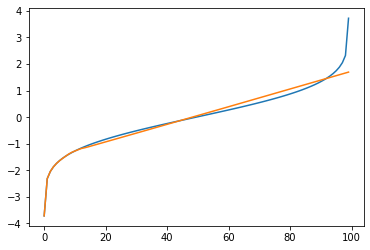

epoch 500 loss=5.919642


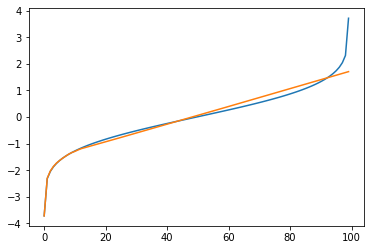

epoch 550 loss=5.903181


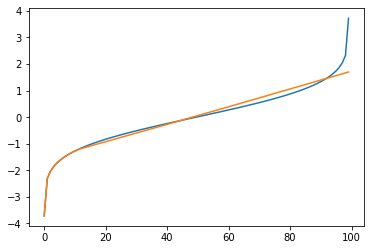

epoch 600 loss=5.840376


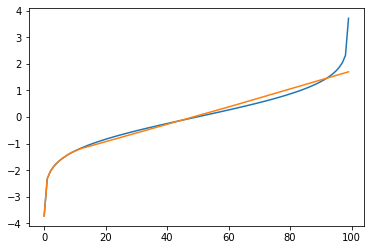

epoch 650 loss=5.762210


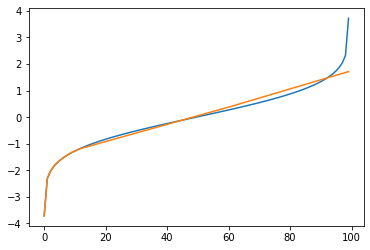

epoch 700 loss=5.659930


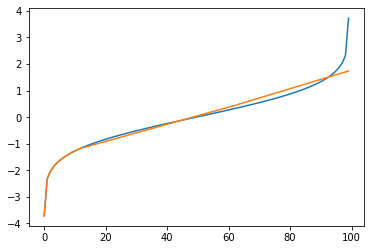

epoch 750 loss=7.480876


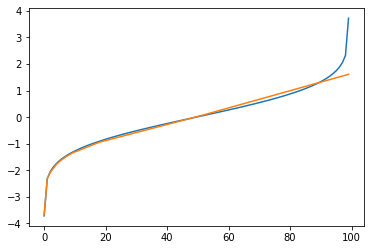

epoch 800 loss=5.740677


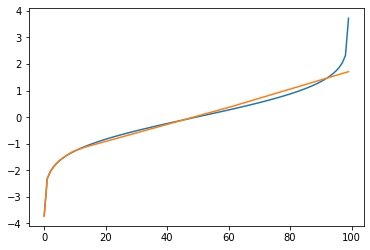

epoch 850 loss=5.561215


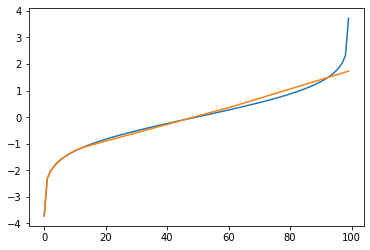

epoch 900 loss=5.383986


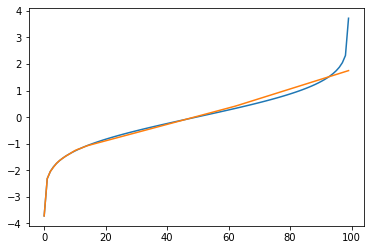

epoch 950 loss=5.160301


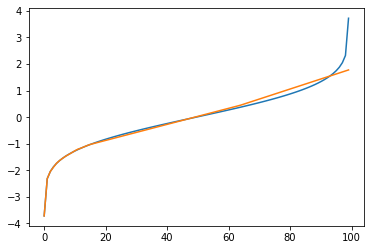

epoch 999 loss=4.802881


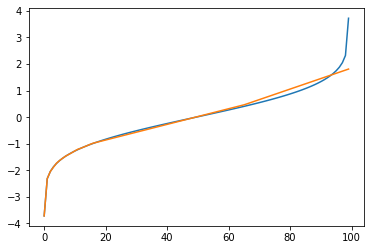

Finished training


In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

sig_torch = torch.from_numpy(sig).float()
Nx_torch = torch.from_numpy(Nx).float()

class Const(nn.Module):
    def __init__(self):
        super(Const, self).__init__()
        self.l1 = nn.Linear(10,30)
        self.l2 = nn.Linear(30,30)
        self.l3 = nn.Linear(30,30)
        self.l4 = nn.Linear(30,1)
        
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = self.l4(x)
        return x
    
const = Const()
optim = torch.optim.Adam(const.parameters(), lr=1e-2)

running = 0
pEpoch = 50
nEpoch = 1000

for i in range(nEpoch):
    optim.zero_grad()
    out, idcs = torch.sort(const(sig_torch),0)
    loss = torch.sum((out - Nx_torch)**2)
    loss.backward()
    optim.step()
    running += loss
    if i % pEpoch == 0 or i == nEpoch-1:
        if i != 0:
            running /= pEpoch
        print('epoch {:d} loss={:f}'.format(i, running))
        plt.plot(Nx_torch.detach().numpy())
        plt.plot(out.detach().numpy())
        plt.show()
        running = 0
    
print('Finished training')

torch.return_types.sort(
values=tensor([[   0.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
            0.0000,    0.0000,    0.0000,    0.0000],
        [  -1.8561,   -1.2225,   -0.5655,   -0.5244,   -0.4469,   -0.2529,
            0.5723,    0.8664,    1.1662,    1.7321],
        [  -3.7122,   -2.4450,   -1.1309,   -1.0487,   -0.8938,   -0.5058,
            1.1446,    1.7328,    2.3325,    3.4642],
        [  -5.5683,   -3.6675,   -1.6964,   -1.5731,   -1.3407,   -0.7588,
            1.7169,    2.5992,    3.4987,    5.1963],
        [  -7.4244,   -4.8900,   -2.2619,   -2.0975,   -1.7876,   -1.0117,
            2.2892,    3.4655,    4.6649,    6.9284],
        [  -9.2805,   -6.1125,   -2.8273,   -2.6218,   -2.2345,   -1.2646,
            2.8615,    4.3319,    5.8312,    8.6606],
        [ -11.1367,   -7.3349,   -3.3928,   -3.1462,   -2.6814,   -1.5175,
            3.4338,    5.1983,    6.9974,   10.3927],
        [ -12.9928,   -8.5574,   -3.9583,   -3.6706,   -3.1283,  

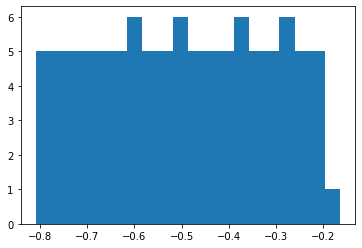

In [70]:
res = const(sig_torch).detach().numpy()

plt.hist(res, 20)
plt.show()